In [281]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from plotnine import *

## Part One: Data Exploration

### 1.

In [282]:
df = pd.read_csv('/Users/benji/Documents/Machine Learning/Data/insurance_costs_1.csv')
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


### 2.

In [317]:
df.describe()

,age,bmi,smoker,charges
count,431.000000,431.000000,431.000000,431.000000
mean,37.960557,30.768898,0.201856,12297.098118
std,16.363909,6.111362,0.401852,11876.527128
min,18.000000,15.960000,0.000000,1131.506600
25%,22.000000,26.357500,0.000000,2710.444575
50%,34.000000,30.590000,0.000000,9866.304850
75%,55.000000,35.272500,0.000000,14510.872600
max,64.000000,49.060000,1.000000,55135.402090


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB


In [287]:
df.isna().sum()

age                 0
sex                 0
bmi                 0
charges             0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [ ]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

### 3.

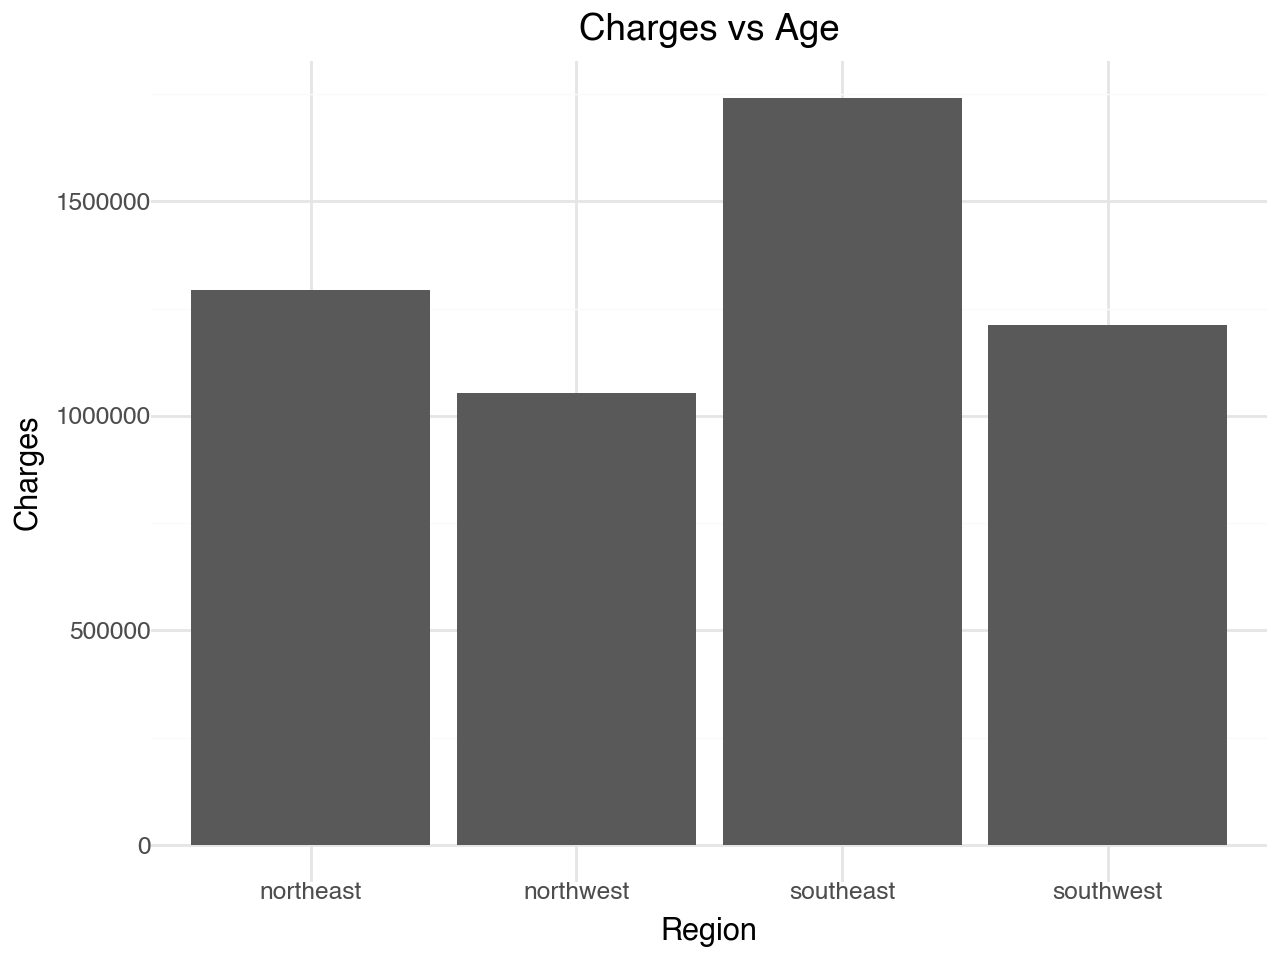

In [289]:
plot1 = (ggplot(df, aes(x='region', y='charges')) +
         geom_bar(stat="identity") +
         labs(title="Charges vs Age", x="Region", y="Charges") +
         theme_minimal())
plot1

Southeast Region get charged the most.

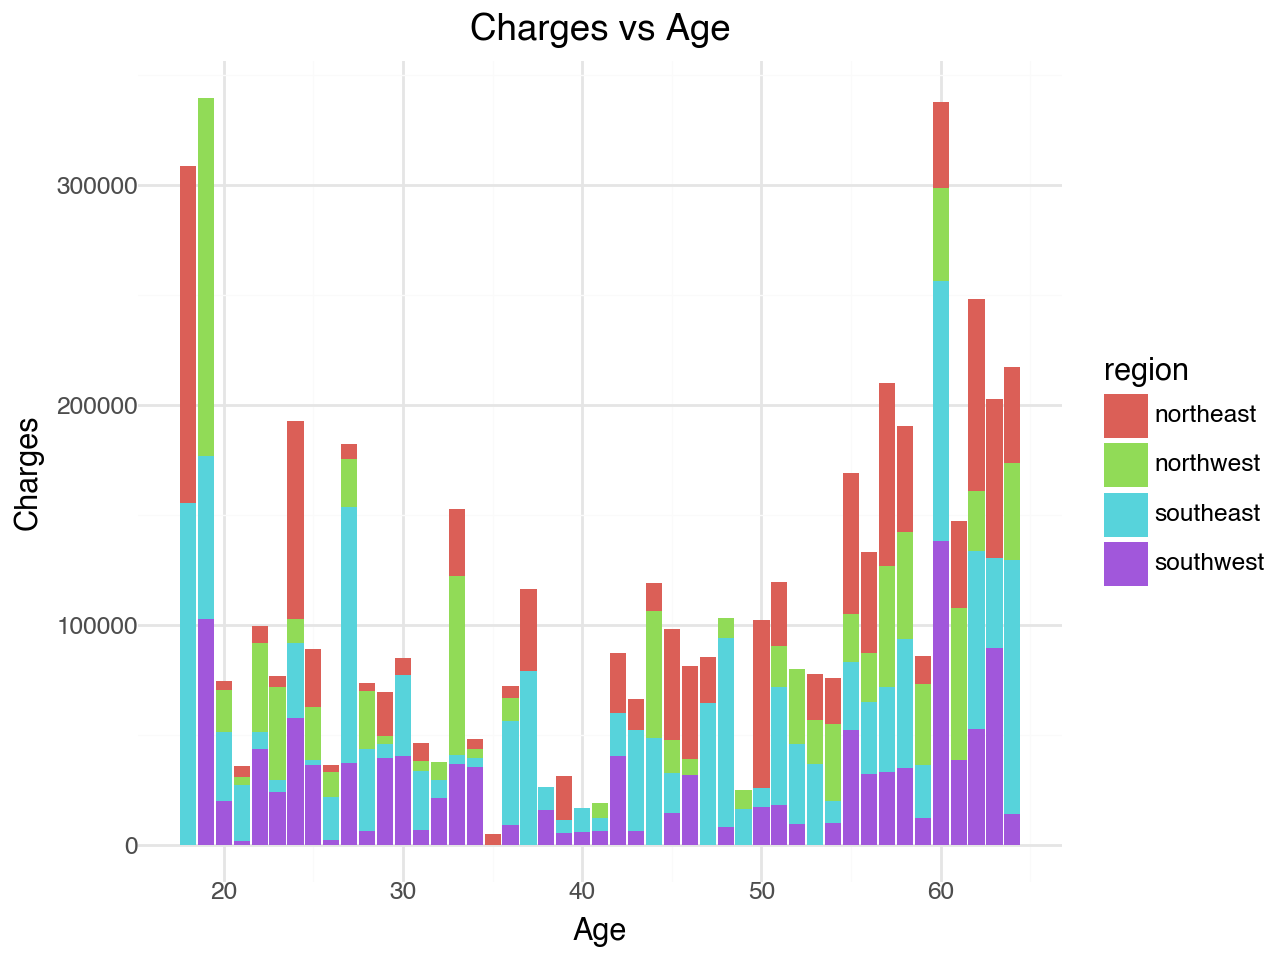

In [290]:
plot2 = (ggplot(df, aes(x='age', y='charges', fill ='region')) +
         geom_bar(stat="identity") +
         labs(title="Charges vs Age", x="Age", y="Charges") +
         theme_minimal())
plot2

It wierdly looks the a upside down normal distribution. Can se most charges happen on the extreme ages.

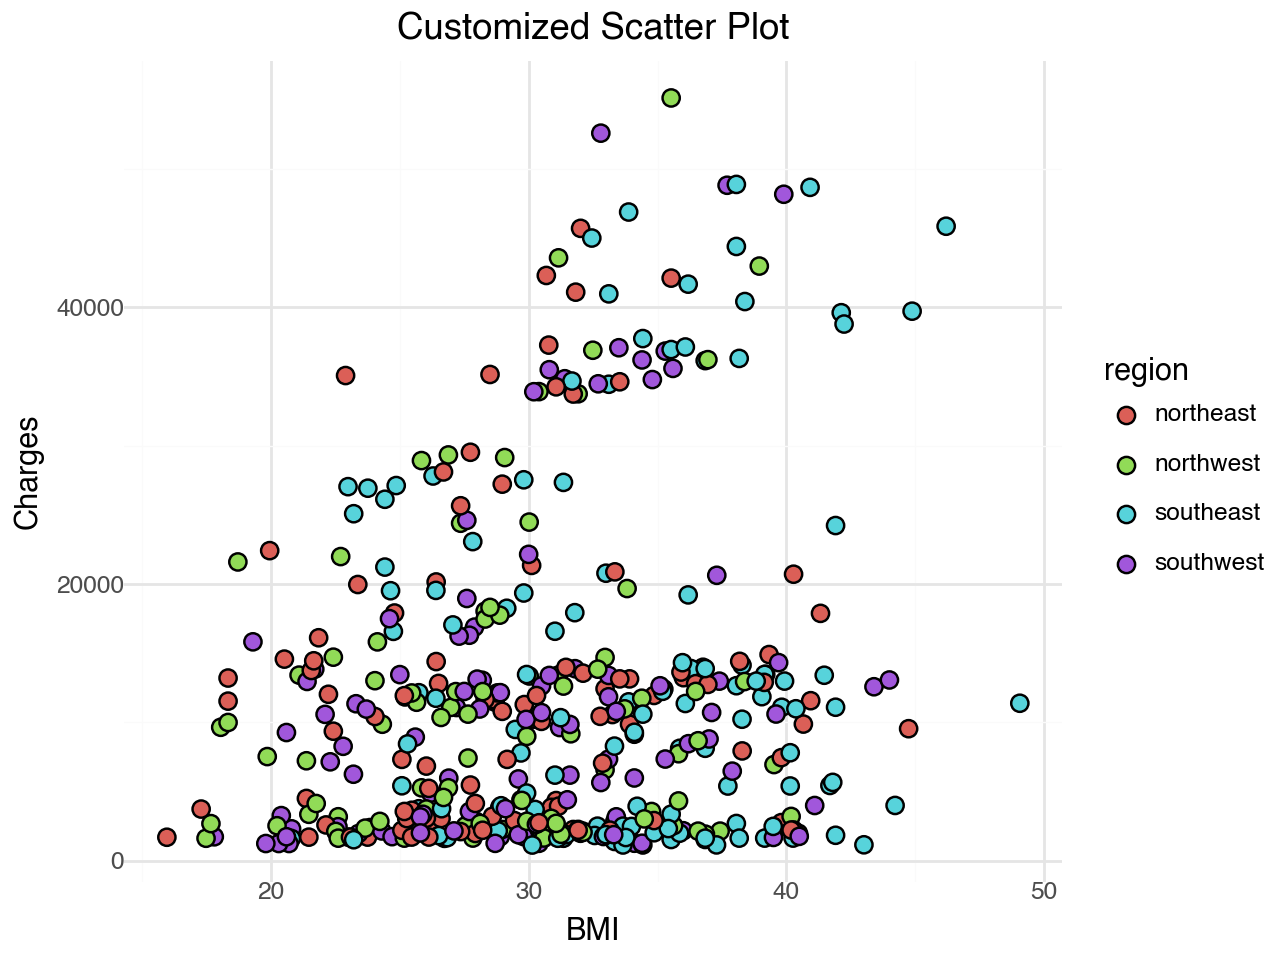

In [291]:
plot3 = (
    ggplot(df, aes(x='bmi', y='charges',fill='region')) +
    geom_point( size=3) +
    ggtitle("Customized Scatter Plot") +
    labs(x="BMI", y="Charges")+
    theme_minimal()
)
plot3

This scatter plot show there is not a proper correlation between Charges and BMI

## Part Two: Simple Linear Models

In [292]:
# Split data into training and test sets
X = df.drop(columns='charges')
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

**Created a fuction to find the results of the models.**

In [293]:
def Analysis(ctName):
    modelPipeline = Pipeline(
        [("preprocessing",ctName),
        ("regression",LinearRegression())]
    )
    modelPipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = modelPipeline.predict(X_test)

    # Calculate MSE, RMSE, and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r_squared = modelPipeline.score(X_test, y_test)

    # Store results
    coefficients = modelPipeline.named_steps["regression"].coef_

    # Store and print results
    results = {
        'MSE': mse,
        'R-squared': r_squared,
        'Coefficients': coefficients,
        'y_pred':y_pred
    }
    return results

### 1.

In [318]:
p1q1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),
    ],
    remainder="drop"
)

result= Analysis(p1q1)
print(f"MSE: {result['MSE']:.2f}\nR-squared: {result['R-squared']:.4f}\nCoefficients: {result['Coefficients']}")


MSE: 104183145.24
R-squared: 0.1433
Coefficients: [3583.10363663]


The model doesn't really fit well as we can see the R-squared value is very less and MSE values is very high.

### 2.

In [319]:
p1q2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),
        ('category', OneHotEncoder(drop='first'),['sex'])
    ],
    remainder="drop"
)

result = Analysis(p1q2)
print(f"MSE: {result['MSE']:.2f}\nR-squared: {result['R-squared']:.4f}\nCoefficients: {result['Coefficients']}")

MSE: 103934834.02
R-squared: 0.1454
Coefficients: [3568.37602567  544.00052728]


### 3.

In [320]:
p1q3 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),
        ('category', OneHotEncoder(drop='first'),['smoker'])
    ],
    remainder="drop"
)

result = Analysis(p1q3)
print(f"MSE: {result['MSE']:.2f}\nR-squared: {result['R-squared']:.4f}\nCoefficients: {result['Coefficients']}")

MSE: 28900222.05
R-squared: 0.7624
Coefficients: [ 4021.36501811 24070.95311727]


### 4.
Comparing Q2 and Q3, we can the R value in Q3(0.76) is greater than Q2(0.14) and MSE value in Q3 is lower compared to Q2, this implies model in Q3 fits better.

## Part Three: Multiple Linear Models

### 1.

In [321]:
p2q1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age','bmi']),
    ],
    remainder="drop"
)
result = Analysis(p2q1)
print(f"MSE: {result['MSE']:.2f}\nR-squared: {result['R-squared']:.4f}\nCoefficients: {result['Coefficients']}")

MSE: 98584433.29
R-squared: 0.1893
Coefficients: [3422.39859245 1499.81564612]


Comparing to Part Two Q1, R-squared value is little more and MSE value is little less, which is good but that differnces is not very significant.

### 2.

In [322]:
p2q2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),
        ("Polynomial", PolynomialFeatures(degree=2, include_bias= False), ["age"])
    ],
    remainder="drop"
)
result = Analysis(p2q2)
print(f"MSE: {result['MSE']:.2f}\nR-squared: {result['R-squared']:.4f}\nCoefficients: {result['Coefficients']}")

MSE: 104343659.07
R-squared: 0.1420
Coefficients: [ 11.39318376 185.82954986   0.41811783]


Comparing to Part Two Q1, R-squared value is less and MSE value is little more, which is says this model is worse than model in Part two Q1.

### 3.

In [323]:
p2q3 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),
        ("Polynomial", PolynomialFeatures(degree=4, include_bias= False), ["age"])
    ],
    remainder="drop"
)
result = Analysis(p2q3)
print(f"MSE: {result['MSE']:.2f}\nR-squared: {result['R-squared']:.4f}\nCoefficients: {result['Coefficients']}")

MSE: 104779118.09
R-squared: 0.1384
Coefficients: [-3.39351089e+02 -5.53501650e+03  2.66826421e+02 -5.07335018e+00
  3.37835817e-02]


Comparing to Part Two Q1, R-squared value is less and MSE value is little more, which is says this model is worse than model in Part two Q1.

### 4.

In [324]:
p2q4 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),
        ("Polynomial", PolynomialFeatures(degree=12, include_bias= False), ["age"])
    ],
    remainder="drop"
)
result = Analysis(p2q4)
print(f"MSE: {result['MSE']:.2f}\nR-squared: {result['R-squared']:.4f}\nCoefficients: {result['Coefficients']}")

MSE: 106348852.69
R-squared: 0.1255
Coefficients: [ 8.14091214e-11  1.72056386e-05  2.91154303e-08  9.23615040e-07
  1.52608773e-05  1.81738876e-04  1.21103568e-03 -1.45754104e-04
  7.27464566e-06 -1.92607384e-07  2.84764866e-09 -2.22678816e-11
  7.19286479e-14]


Comparing to Part Two Q1, R-squared value is less and MSE value is little more, which is says this model is worse than model in Part two Q1.

### 5.
From the model we have, If we take smoker as variable then the R values increases and MSE decreases, but if we have to neglect that model with age and bmi give comparetively good results but it still have low R-squared value approx 0.2 and a very high MSE value.

### 6.

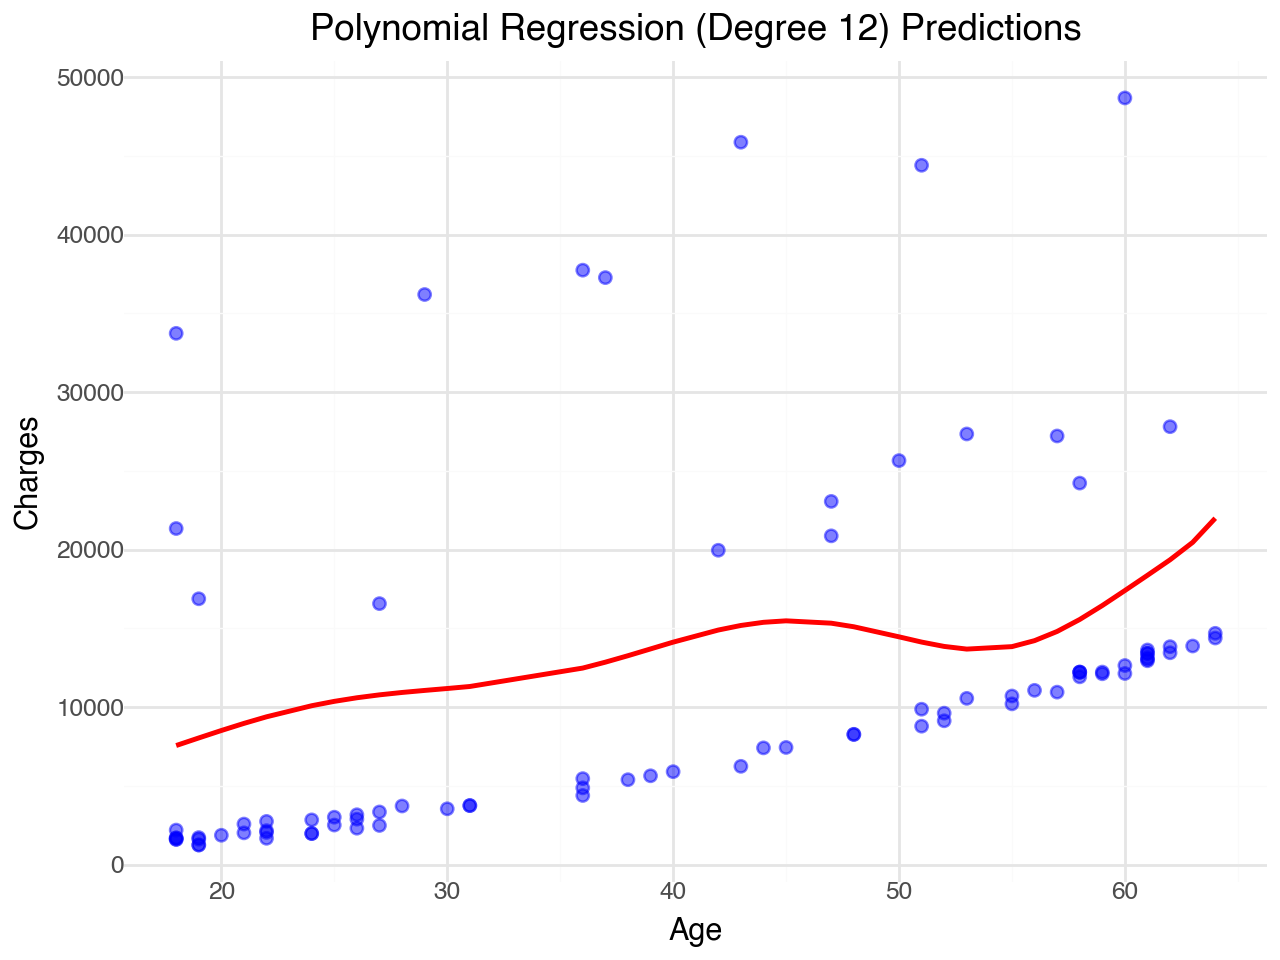

In [301]:
predicted_df = pd.DataFrame({
    'age': X_test['age'],
    'y_true': y_test,
    'y_pred': result['y_pred']
})
plot = (ggplot(predicted_df, aes(x='age')) 
        + geom_point(aes(y='y_true'), color='blue', size=2, alpha=0.5)  # Original data points
        + geom_line(aes(y='y_pred'), color='red', size=1)  # Polynomial regression predictions
        + labs(title="Polynomial Regression (Degree 12) Predictions",
               x="Age", y="Charges")
        + theme_minimal()
        )

plot

## Part Four: New data

In [302]:
newData = pd.read_csv('/Users/benji/Documents/Machine Learning/Data/insurance_costs_2.csv')
newData['smoker'] = newData['smoker'].map({'yes': 1, 'no': 0})


In [303]:
newData

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,0,southwest,1826.84300
1,56,male,40.300,0,southwest,10602.38500
2,18,male,34.100,0,southeast,1137.01100
3,63,female,23.085,0,northeast,14451.83515
4,63,male,28.310,0,northwest,13770.09790
...,...,...,...,...,...,...
138,19,male,34.900,1,southwest,34828.65400
139,45,male,30.360,1,southeast,62592.87309
140,43,male,27.800,1,southwest,37829.72420
141,24,female,27.720,0,southeast,2464.61880


In [304]:
# Split data into training and test sets
newX = newData.drop(columns='charges')
newy = newData['charges']

Created the fucntion to fit the model and to get the results with the new and old dataset.

In [305]:
def newAnalysis(ctName):
    modelPipeline = Pipeline(
        [("preprocessing",ctName),
        ("regression",LinearRegression())]
    )
    modelPipeline.fit(X, y)

    # Predict on the test set
    y_pred = modelPipeline.predict(newX)

    # Calculate MSE, RMSE, and R-squared
    mse = mean_squared_error(newy, y_pred)
    r_squared = modelPipeline.score(newX, newy)

    # Store results
    coefficients = modelPipeline.named_steps["regression"].coef_

    # Store and print results
    results = {
        'MSE': mse,
        'R-squared': r_squared,
        'Coefficients': coefficients,
        'y_pred':y_pred
    }
    return results

Model with only age as a predictor.

In [306]:
mdoel1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age'])
    ],
    remainder="drop"
)
result = newAnalysis(mdoel1)
print(f"MSE: {result['MSE']:.2f}\nR-squared: {result['R-squared']:.4f}\nCoefficients: {result['Coefficients']}")

MSE: 136077136.50
R-squared: 0.1224
Coefficients: [3739.70080761]


Age and bmi as a predictor.

In [307]:
mdoel2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age','bmi'])
    ],
    remainder="drop"
)
result = newAnalysis(mdoel2)
print(f"MSE: {result['MSE']:.2f}\nR-squared: {result['R-squared']:.4f}\nCoefficients: {result['Coefficients']}")

MSE: 132636406.11
R-squared: 0.1446
Coefficients: [3535.35939421 1728.75207656]


Model with age, bmi, and smoker as predictors (no interaction terms)

In [308]:
mdoel3 = ColumnTransformer(
    transformers=[
        ('encode',OneHotEncoder(drop= 'first',sparse_output=False),['smoker']),
        ('num', StandardScaler(), ['age','bmi'])
    ],
    remainder="drop"
)
result = newAnalysis(mdoel3)
print(f"MSE: {result['MSE']:.2f}\nR-squared: {result['R-squared']:.4f}\nCoefficients: {result['Coefficients']}")

MSE: 35377541.24
R-squared: 0.7718
Coefficients: [24043.82827651  3934.57463693  1717.24340827]


Model with age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

In [309]:
inter1 = ColumnTransformer(
    transformers=[
        ('encode',OneHotEncoder(drop= 'first',sparse_output=False),['smoker']),
        ('num', StandardScaler(), ['age', 'bmi']),  # Scale age and bmi
        ('interaction1', PolynomialFeatures(degree=1, interaction_only=True, include_bias=False),['bmi', 'smoker']),
        ('interaction2', PolynomialFeatures(degree=1, interaction_only=True, include_bias=False),['age', 'smoker'])  # Interaction terms for age, bmi, and smoker
    ],
    remainder='drop'
).set_output(transform = "pandas")

result = newAnalysis(inter1)
print(f"MSE: {result['MSE']:.2f}\nR-squared: {result['R-squared']:.4f}\nCoefficients: {result['Coefficients']}")

MSE: 35377541.24
R-squared: 0.7718
Coefficients: [8014.6094255    14.67269595   44.88106028  273.96604779 8014.6094255
  239.82395487 8014.6094255 ]


Model with age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

In [315]:
inter2 = ColumnTransformer(
    transformers=[
        #('encode',OneHotEncoder(drop= 'first',sparse_output=False),['smoker']),
        ('num', StandardScaler(), ['age', 'bmi']),  # Scale age and bmi
        ('interaction1', PolynomialFeatures(degree=1, interaction_only=True, include_bias=False),['bmi','age' ,'smoker']),
    ],
    remainder='drop'
).set_output(transform = "pandas")

result = newAnalysis(inter2)
print(f"MSE: {result['MSE']:.2f}\nR-squared: {result['R-squared']:.4f}\nCoefficients: {result['Coefficients']}")

MSE: 35377541.24
R-squared: 0.7718
Coefficients: [1.46726959e+01 4.48810603e+01 2.73966048e+02 2.39823955e+02
 2.40438283e+04]


Plot of the chosen model.

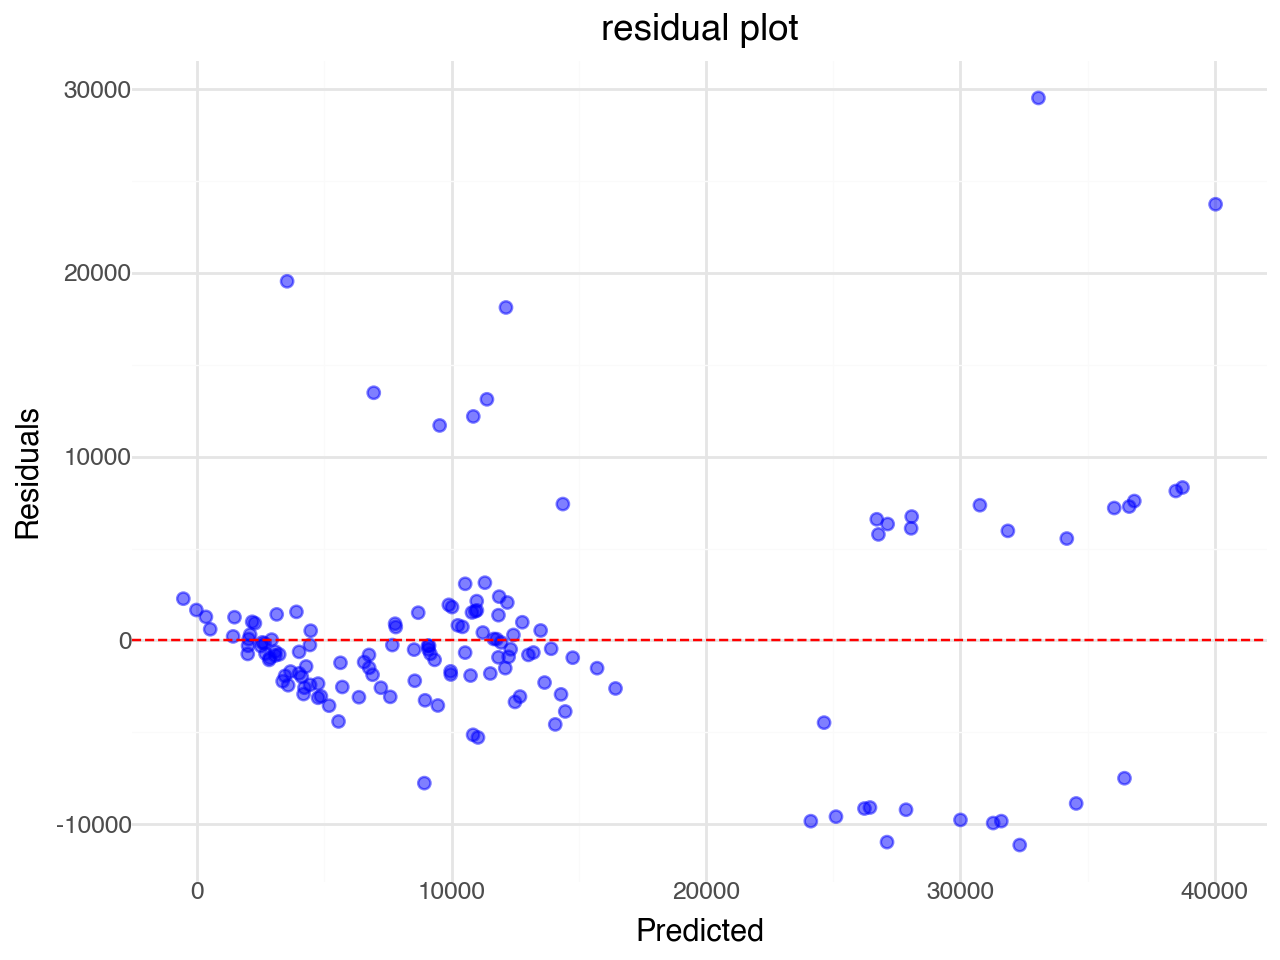

In [311]:
residuals = newy - result['y_pred']
predicted_df = pd.DataFrame({
    'residuals': residuals,
    'y_pred': result['y_pred']
})
plot = (ggplot(predicted_df, aes(x='y_pred')) 
        + geom_point(aes(y='residuals'), color='blue', size=2, alpha=0.5)  # Original data points
        + geom_hline(yintercept=0, color='red', linetype='--')
        #+ geom_line(aes(y='y_pred'), color='red', size=1)  # Polynomial regression predictions
        + labs(title="residual plot",
               x="Predicted", y="Residuals")
        + theme_minimal()
        )

plot

## Part Five: Full Exploration

In [314]:
interFin = ColumnTransformer(
    transformers=[
        #('encode',OneHotEncoder(drop= 'first',sparse_output=False),['region']),
        ('num', StandardScaler(), ['age', 'bmi']),  # Scale age and bmi
        ('interaction1', PolynomialFeatures(degree=3, interaction_only=True, include_bias=False),['bmi','age', 'smoker']),
    ],
    remainder='drop'
).set_output(transform = "pandas")

result = newAnalysis(interFin)
print(f"MSE: {result['MSE']:.2f}\nR-squared: {result['R-squared']:.4f}\nCoefficients: {result['Coefficients']}")

MSE: 21649538.60
R-squared: 0.8604
Coefficients: [ 1.64393990e+01  3.13403151e+00  1.91309702e+01  2.68700564e+02
 -1.70310067e+04 -3.69803672e-01  1.35217402e+03 -1.21376788e+02
  3.54823131e+00]


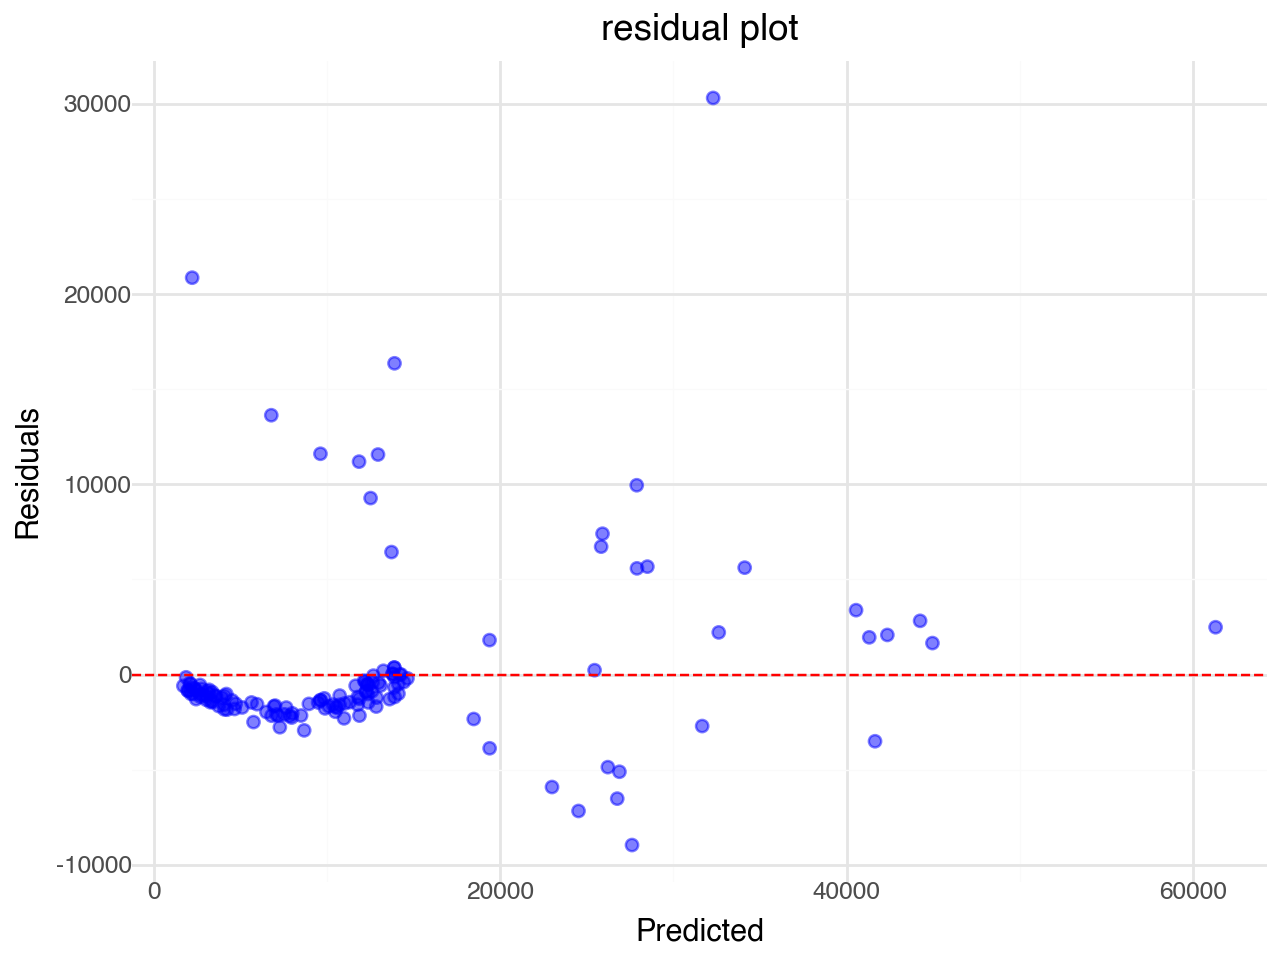

In [ ]:
residuals = newy - result['y_pred']
predicted_df = pd.DataFrame({
    'residuals': residuals,
    'y_pred': result['y_pred']
})
plot = (ggplot(predicted_df, aes(x='y_pred')) 
        + geom_point(aes(y='residuals'), color='blue', size=2, alpha=0.5)  # Original data points
        + geom_hline(yintercept=0, color='red', linetype='--')
        + labs(title="residual plot",
               x="Predicted", y="Residuals")
        + theme_minimal()
        )

plot

Using all the variable and having interactin with the degree 3 give the best model which has R-squared value of .8574 and the least MSE among all the models.

**ChatGpt was used to understand about the ColumnTransformer and Pipeline. ChatGpt was also used to debug the code.**